<a href="https://colab.research.google.com/github/annazinkevich/machine_learning/blob/Keras/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

Загрузка обучающей и тестовой выборок

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Нормализация входных данных

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

Преобразование выходных значений в векторы по категориям

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Разбиение на обучающую выборку и выборку валидации

In [ ]:
limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]

Формирование модели НС

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    Dropout(0.8),
    Dense(10, activation='softmax') ])

Компиляция НС с оптимизацией по Adam и критерием качества - категориальная кросс-энтропия

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Запуск процесса обучения

In [ ]:
his = model.fit(x_train_data,
                y_train_data,
                epochs=50,
                batch_size=32,
                validation_data=(x_valid, y_valid))

Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 1.1628 - accuracy: 0.6274 - val_loss: 0.4966 - val_accuracy: 0.8734
Epoch 2/50
157/157 [==============================] - 1s 9ms/step - loss: 0.6075 - accuracy: 0.8230 - val_loss: 0.3754 - val_accuracy: 0.9012
Epoch 3/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4811 - accuracy: 0.8536 - val_loss: 0.3255 - val_accuracy: 0.9074
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4376 - accuracy: 0.8688 - val_loss: 0.3012 - val_accuracy: 0.9118
Epoch 5/50
157/157 [==============================] - 3s 20ms/step - loss: 0.3906 - accuracy: 0.8776 - val_loss: 0.2930 - val_accuracy: 0.9158
Epoch 6/50
157/157 [==============================] - 2s 14ms/step - loss: 0.3591 - accuracy: 0.8920 - val_loss: 0.2701 - val_accuracy: 0.9220
Epoch 7/50
157/157 [==============================] - 2s 15ms/step - loss: 0.3327 - accuracy: 0.8978 - val_loss: 0.2613 - val_accuracy: 0.9224


Графики для обучающей выборки и выборки валидации без использования алгоритма dropout(эффект переобучения)

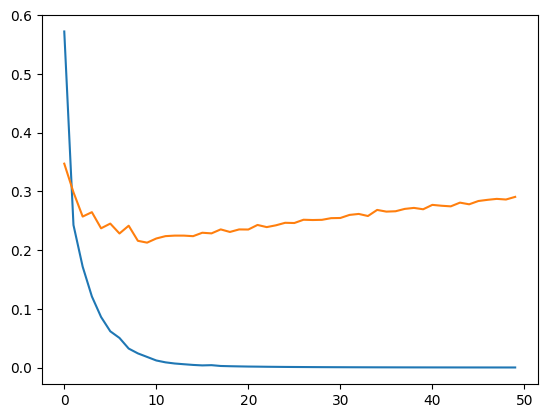

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

Применение алгоритма dropout

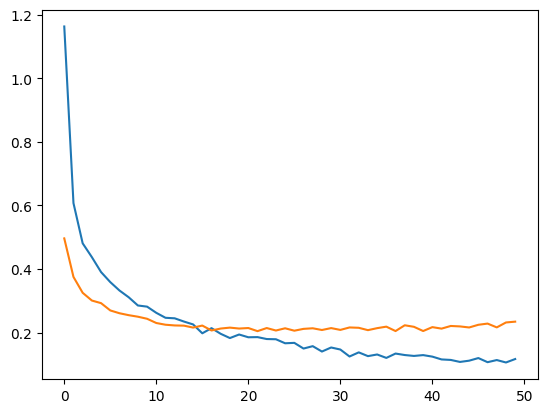

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()